## Problem Statement:

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like telecasting, e-mails, recommendations on net banking, mobile banking, etc.

In this case, the Happy Customer Bank wants to cross-sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card.

* ID:	Unique Identifier for a row
* Gender:	Gender of the Customer
* Age: Age of the Customer (in Years)
* Region_Code:	Code of the Region for the customers
* Occupation:	Occupation Type for the customer
* Channel_Code:	Acquisition Channel Code for the Customer (Encoded)
* Vintage:	Vintage for the Customer (In Months) - month or quarter in which account was opened (loan was granted)
* Credit_Product:	If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)
* Avg_Account_Balance:	Average Account Balance for the Customer in last 12 Months
* Is_Active:	If the Customer is Active in last 3 Months
* Is_Lead(Target):	If the Customer is interested for the Credit Card , 0 : Customer is not interested , 1 : Customer is interested


### Steps to Solve the problem
A. Loo at the big picture
##### 1. Frame the problem
- What is the business objective
- How does the company expect to use and benefit from the model
##### 2. What is the current solution loos lie?
##### 3. Is there a continuous flow of data?
##### 4. Performance Measure - Select
##### 5. Chec for Assumptions

B.Get the data
##### 1. Download the data
##### 2. Quic loo at the datastructures - info(), value_count(), describe()
##### 3. Plots - histogram
##### chec - data scaled & capped; how data was compiled; features at different scales; sewed data (patterns)

C.Discover and visualise the data to gain insights
##### 1. SCatterplots
##### 2. Correlations
##### 3. Experiment with attribute combination for correlated features

D. Prepare the data for ML:
##### 1. Write functions
##### 2. Data cleaning
##### 3. Handling Text & Categorical Attributes
##### Ordinal/One Hot Encoding
##### Custom Transformers
##### Feature Scaling
##### Transformation

E. Select & Train a model
##### 1. Training & Evaluating on the training set
##### 2. Date Split (CV, train_test_split)

F. Fine Tune Your Model
##### 1. GridSearch Vs. RandomisedSearch
#####     Ensemble methods
##### 2. Analyse best models and their errors.
##### 3. Evaluate your system on the Test set.

G. Launch, Monitor and Maintain your system
##### 1. Present your solution
##### i. What have you learned?
##### ii. Wht wored, what didnot wor?
##### iii. What assumptions were made?
##### iv. What your system's limitation?

##### 2. Deploy your model
##### 3. Monitor your system
##### i. collect fresh data regularly & label it.
##### ii. write a script to train a model & finetune the hyperparameter automatically.
##### iii. Evaluate New model & Previous model & deploy
##### iv. eep bacup of your datasets & model.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv(r'C:\Users\RONALD\Desktop\IMS-Classroom\Python Code\Resume Project - ML Algo\Credit Card Lead Prediction\archive\Train_Data.csv')
validation_data = pd.read_csv(r'C:\Users\RONALD\Desktop\IMS-Classroom\Python Code\Resume Project - ML Algo\Credit Card Lead Prediction\archive\Test_Data.csv')

In [3]:
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
validation_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


#### Train data

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
train_data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [7]:
train_data.describe(include=np.object)

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
count,245725,245725,245725,245725,245725,216400,245725
unique,245725,2,35,4,4,2,2
top,IQQLKBA2,Male,RG268,Self_Employed,X1,No,No
freq,1,134197,35934,100886,103718,144357,150290


In [8]:
num_cols = train_data[train_data.select_dtypes(include = [np.number]).columns.tolist()]
cat_cols = train_data[train_data.select_dtypes(exclude = [np.number]).columns.tolist()]

In [9]:
for i in cat_cols:
    print("Column Name: ", i)
    print(train_data[i].value_counts())
    print("-------------")

Column Name:  ID
IQQLKBA2    1
MHWMRRRV    1
CVWDCSF6    1
2XL5ZNTN    1
Y3M24TW6    1
           ..
B97LYSSV    1
4D8GJ5JG    1
W4HXVVDF    1
YCZHPTG7    1
HZXQGZGU    1
Name: ID, Length: 245725, dtype: int64
-------------
Column Name:  Gender
Male      134197
Female    111528
Name: Gender, dtype: int64
-------------
Column Name:  Region_Code
RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64
-------------
Column Name:  Occupation
Self_Employed    100886
Salaried          71999
Other     

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C81CE1FD0>,
      dtype=object)

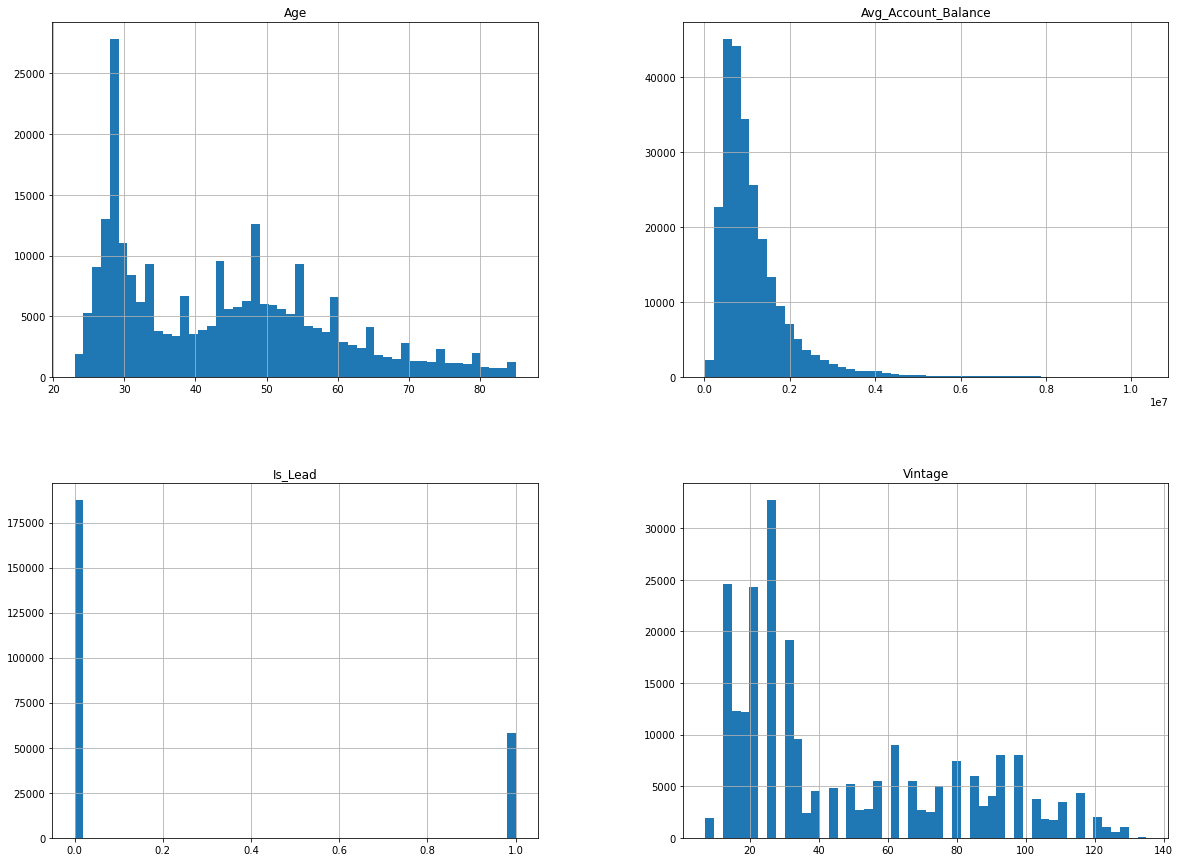

In [10]:
train_data.hist(bins=50, figsize=(20,15))

In [11]:
train_data.skew(axis = 0, skipna = True)

Age                    0.618992
Vintage                0.790189
Avg_Account_Balance    2.968727
Is_Lead                1.235596
dtype: float64

In [12]:
train_data.kurtosis(axis = 0, skipna = True)

Age                    -0.441273
Vintage                -0.696540
Avg_Account_Balance    14.304594
Is_Lead                -0.473307
dtype: float64

In [13]:
train_data['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

train_data.plot(kind="scatter")

In [14]:
#### Checking unique values for each independent variable in Train dataset
for i in range(train_data.shape[1]):
    col_name = train_data.columns[i]
    print('Column Name: ', col_name)
    print(train_data[col_name].value_counts())
    print('--------- ')

Column Name:  ID
IQQLKBA2    1
MHWMRRRV    1
CVWDCSF6    1
2XL5ZNTN    1
Y3M24TW6    1
           ..
B97LYSSV    1
4D8GJ5JG    1
W4HXVVDF    1
YCZHPTG7    1
HZXQGZGU    1
Name: ID, Length: 245725, dtype: int64
--------- 
Column Name:  Gender
Male      134197
Female    111528
Name: Gender, dtype: int64
--------- 
Column Name:  Age
28    14533
29    13284
27    13005
30    11066
26     9039
      ...  
82      749
83      694
84      624
85      604
23        1
Name: Age, Length: 63, dtype: int64
--------- 
Column Name:  Region_Code
RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     178

In [15]:
train_data['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

#### Step 2: Data Cleaning

#### Missing value identification & treatment

In [16]:
train_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [17]:
train_data['Credit_Product'].fillna(train_data['Credit_Product'].mode()[0], inplace=True)

In [18]:
train_data.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

pred

In [19]:
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
